# Question 6
For this question, we'll see how to use a linear regression model from Scikit-Learn.
We'll need to use the original column price. Apply the logarithmic transformation to this column.
Fit the Ridge regression model on the training data with a solver 'sag'. Set the seed to 42.
This model also has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10].
Round your RMSE scores to 3 decimal digits.
Which of these alphas leads to the best RMSE on the validation set?

In [13]:
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv")

In [4]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [6]:
data = data[['MSRP','Make', 'Model',  'Year', 'Engine HP','Engine Cylinders','Transmission Type',
'Vehicle Style','highway MPG','city mpg']]

In [7]:
data.columns = data.columns.str.replace(' ', '_').str.lower()

In [8]:
data.rename(columns={'msrp':'price'}, inplace=True)

In [9]:
data

,price,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg
0,46135,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19
1,40650,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19
2,36350,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20
3,29450,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18
4,34500,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18
...,...,...,...,...,...,...,...,...,...,...
11909,46120,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16
11910,56670,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16
11911,50620,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16
11912,50920,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16


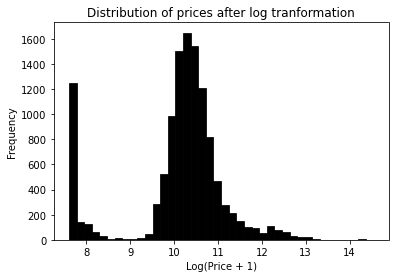

In [14]:
log_price = np.log1p(data.price)
plt.figure(figsize=(6, 4))

sns.histplot(log_price, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Distribution of prices after log tranformation')

plt.show()

In [16]:
data.price = log_price

In [18]:
data = data.fillna(0)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
df_full_train, df_test = train_test_split(data, test_size=.2, random_state=1)

In [21]:
df_train, df_val = train_test_split(df_full_train, test_size=.25, random_state=1)

In [22]:
len(df_full_train), len (df_test), len(df_val)

(9531, 2383, 2383)

In [23]:
df_train

,price,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg
5727,10.829451,Toyota,Highlander Hybrid,2016,280.0,6.0,AUTOMATIC,4dr SUV,28,27
5814,10.197686,Chevrolet,Impala Limited,2014,300.0,6.0,AUTOMATIC,Sedan,30,18
8450,10.504821,Buick,Regal,2016,259.0,4.0,AUTOMATIC,Sedan,27,19
2396,10.682262,Volkswagen,CC,2015,280.0,6.0,AUTOMATED_MANUAL,Sedan,25,17
5494,10.025528,Dodge,Grand Caravan,2016,283.0,6.0,AUTOMATIC,Passenger Minivan,25,17
...,...,...,...,...,...,...,...,...,...,...
5864,9.952087,Subaru,Impreza,2015,148.0,4.0,MANUAL,4dr Hatchback,33,24
7924,10.487127,Infiniti,QX50,2016,325.0,6.0,AUTOMATIC,4dr SUV,24,17
4719,9.916700,Honda,Fit,2017,130.0,4.0,AUTOMATIC,4dr Hatchback,37,32
63,7.601402,Audi,200,1991,162.0,5.0,AUTOMATIC,Sedan,20,16


In [24]:
df_train =  df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val= df_val.reset_index(drop=True)

In [26]:
del df_train['price']

In [33]:
from sklearn.feature_extraction import DictVectorizer

In [34]:
train_dict = df_train.to_dict(orient='records')

In [35]:
train_dict[0]


{'make': 'Toyota',
 'model': 'Highlander Hybrid',
 'year': 2016,
 'engine_hp': 280.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'AUTOMATIC',
 'vehicle_style': '4dr SUV',
 'highway_mpg': 28,
 'city_mpg': 27}

In [36]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [37]:
X_train = dv.transform(train_dict)

In [38]:
X_train.shape

(7148, 954)

In [40]:
dv.get_feature_names_out()

array(['city_mpg', 'engine_cylinders', 'engine_hp', 'highway_mpg',
       'make=Acura', 'make=Alfa Romeo', 'make=Aston Martin', 'make=Audi',
       'make=BMW', 'make=Bentley', 'make=Bugatti', 'make=Buick',
       'make=Cadillac', 'make=Chevrolet', 'make=Chrysler', 'make=Dodge',
       'make=FIAT', 'make=Ferrari', 'make=Ford', 'make=GMC',
       'make=Genesis', 'make=HUMMER', 'make=Honda', 'make=Hyundai',
       'make=Infiniti', 'make=Kia', 'make=Lamborghini', 'make=Land Rover',
       'make=Lexus', 'make=Lincoln', 'make=Lotus', 'make=Maserati',
       'make=Maybach', 'make=Mazda', 'make=McLaren', 'make=Mercedes-Benz',
       'make=Mitsubishi', 'make=Nissan', 'make=Oldsmobile',
       'make=Plymouth', 'make=Pontiac', 'make=Porsche',
       'make=Rolls-Royce', 'make=Saab', 'make=Scion', 'make=Spyker',
       'make=Subaru', 'make=Suzuki', 'make=Tesla', 'make=Toyota',
       'make=Volkswagen', 'make=Volvo', 'model=1 Series',
       'model=1 Series M', 'model=100', 'model=124 Spider',
     

In [42]:
y_train = df_train.values
y_val = df_val.values

In [46]:
numerical = ['year', 'engine_hp', 'engine_cylinders','highway_mpg', 'city_mpg']
categorical = ['make', 'model', 'transmission_type', 'vehicle_style']

# One-hot encoding

In [63]:
from sklearn.feature_extraction import DictVectorizer

In [64]:
train_dict = df_train[categorical+numerical].to_dict(orient='records')

In [65]:
train_dict[0]

{'make': 'Toyota',
 'model': 'Highlander Hybrid',
 'transmission_type': 'AUTOMATIC',
 'vehicle_style': '4dr SUV',
 'year': 2016,
 'engine_hp': 280.0,
 'engine_cylinders': 6.0,
 'highway_mpg': 28,
 'city_mpg': 27}

In [66]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [67]:
X_train = dv.transform(train_dict)

In [68]:
X_train.shape

(7148, 954)

In [69]:
dv.get_feature_names_out()

array(['city_mpg', 'engine_cylinders', 'engine_hp', 'highway_mpg',
       'make=Acura', 'make=Alfa Romeo', 'make=Aston Martin', 'make=Audi',
       'make=BMW', 'make=Bentley', 'make=Bugatti', 'make=Buick',
       'make=Cadillac', 'make=Chevrolet', 'make=Chrysler', 'make=Dodge',
       'make=FIAT', 'make=Ferrari', 'make=Ford', 'make=GMC',
       'make=Genesis', 'make=HUMMER', 'make=Honda', 'make=Hyundai',
       'make=Infiniti', 'make=Kia', 'make=Lamborghini', 'make=Land Rover',
       'make=Lexus', 'make=Lincoln', 'make=Lotus', 'make=Maserati',
       'make=Maybach', 'make=Mazda', 'make=McLaren', 'make=Mercedes-Benz',
       'make=Mitsubishi', 'make=Nissan', 'make=Oldsmobile',
       'make=Plymouth', 'make=Pontiac', 'make=Porsche',
       'make=Rolls-Royce', 'make=Saab', 'make=Scion', 'make=Spyker',
       'make=Subaru', 'make=Suzuki', 'make=Tesla', 'make=Toyota',
       'make=Volkswagen', 'make=Volvo', 'model=1 Series',
       'model=1 Series M', 'model=100', 'model=124 Spider',
     

# Training Linear regression

In [71]:
from sklearn.linear_model import Ridge

In [72]:
model = Ridge(alpha=0, solver='sag',random_state=42)
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'Toyota'